### Airfare Price Prediction

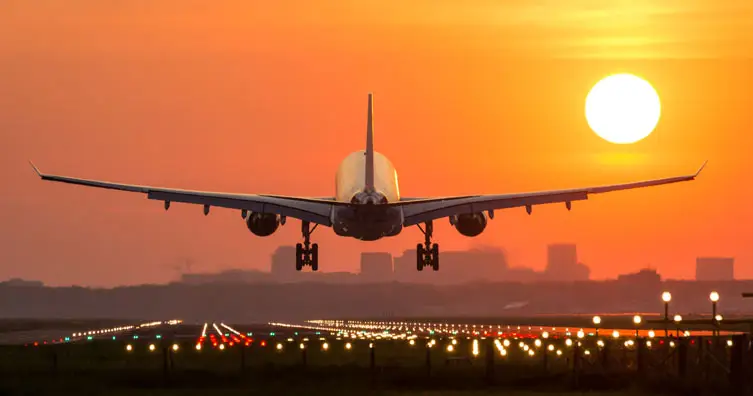

### Problem Statement: To predict the prices of the flight tickets based on the following features as input.
#### Features contained in the dataset are: 
1. Airline: The name of the airline.
2. Date_of_Journey: The date of the journey
3. Source: The source from which the service begins.
4. Destination: The destination where the service ends.
5. Route: The route taken by the flight to reach the destination.
6. Dep_Time: The time when the journey starts from the source.
7. Arrival_Time: Time of arrival at the destination.
8. Duration: Total duration of the flight.
9. Total_Stops: Total stops between the source and destination.
10. Additional_Info: Additional information about the flight
11. Price: The price of the ticket

#### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder

#### The dataset is available in training and testing set respectively.

In [2]:
train_data=pd.read_excel(r'C:\Users\Lenovo\Downloads\Data_Train.xlsx')
test_data=pd.read_excel(r'C:\Users\Lenovo\Downloads\Test_set.xlsx')

#### size prints the total dimensions of the dataset. Here we could see the total rows and columns for the training set are 117513.

In [3]:
train_data.size

117513

#### Here we could see the total rows and columns for the testing set are 26710.

In [4]:
test_data.size

26710

#### shape prints the rows and columns separately for the dataset. The training set has 10683 rows and 11 features.

In [5]:
train_data.shape

(10683, 11)

#### The testing set has 2671 rows and 10 features.

In [6]:
test_data.shape

(2671, 10)

#### head below prints the first 10 rows of the training dataset.

In [7]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


#### tail below prints the last 10 rows of the testing dataset.

In [8]:
test_data.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2661,Jet Airways,27/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,04:25 29 Mar,33h 15m,2 stops,No info
2662,Air India,21/05/2019,Mumbai,Hyderabad,BOM → HYD,13:55,15:25,1h 30m,non-stop,No info
2663,GoAir,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,23:30,07:45 13 May,8h 15m,1 stop,No info
2664,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:30 16 Jun,10h 15m,1 stop,No info
2665,SpiceJet,21/06/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 22 Jun,1h 30m,non-stop,No check-in baggage included
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


#### Information about the dataset such as the datatype of columns, constraints for the columns and so on.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


#### Describes the statistical summary of the dataset for numerical column 'Price'.

In [11]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Checking missing values for training and testing sets.

In [12]:
train_data.isnull().values.any(),test_data.isnull().values.any()

(True, False)

#### Since the traiining set contains missing values we will see which column has missing values.

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Route and Total_Stops has 1 missing value.

#### Checking for duplicate values.

In [14]:
train_data.duplicated().sum()

220

In [15]:
test_data.duplicated().sum()

26

#### Dropping Duplicate Values

In [16]:
train_data1=train_data.drop_duplicates(keep='first')

In [17]:
train_data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [18]:
train_data1.duplicated().sum()

0

In [19]:
test_data1=test_data.drop_duplicates(keep='first')

In [20]:
test_data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [21]:
test_data1.duplicated().sum()

0

#### A new dataset is generated out of existing dataset but without duplicates for the purpose of training to check the model on with and without duplicates. The procedure is performed for training as well as testing dataset.

#### Counting the values for each column's value.

In [22]:
for i in train_data.columns:
    print("Value count for",i,"column:\n",train_data[i].value_counts())
    print("-----------------------------------------------------------")

Value count for Airline column:
 Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------------------------------
Value count for Date_of_Journey column:
 18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019 

#### From the above code we got to know that the values 'No info' and 'No Info' under Additional_Info feature are interpreted as two different values whereas they both are same therefore rectifying this situation below. 

In [23]:
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})

In [24]:
test_data["Additional_Info"] = test_data["Additional_Info"].replace({'No Info': 'No info'})

In [25]:
train_data1["Additional_Info"] = train_data1["Additional_Info"].replace({'No Info': 'No info'})

<ipython-input-25-5147e13d3996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Additional_Info"] = train_data1["Additional_Info"].replace({'No Info': 'No info'})


In [26]:
test_data1["Additional_Info"] = test_data1["Additional_Info"].replace({'No Info': 'No info'})

<ipython-input-26-4914143124bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Additional_Info"] = test_data1["Additional_Info"].replace({'No Info': 'No info'})


#### Replacing the values for Total_Stops for training and testing set for both with and without duplicate datasets.

In [27]:
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [28]:
train_data1['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4],inplace = True)
test_data1['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4],inplace = True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### The changes are being made to the original dataset with duplicate values and updated new dataset without duplicate values in case of both training as well as testing set

#### Feature Engineering 

#### Converting hours into minutes for Duration column.

In [29]:
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [30]:
train_data1['Duration']=  train_data1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data1['Duration']=  test_data1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

<ipython-input-30-df0efe2ffa12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Duration']=  train_data1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
<ipython-input-30-df0efe2ffa12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Duration']=  test_data1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


#### Updating Date of Journey column for training and testing sets with and without duplicates.

In [31]:
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [32]:
train_data1["Journey_day"] = train_data1['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data1["Journey_month"] = train_data1['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data1.drop(["Date_of_Journey"], axis = 1,inplace=True)

<ipython-input-32-7f3572e96c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Journey_day"] = train_data1['Date_of_Journey'].str.split('/').str[0].astype(int)
<ipython-input-32-7f3572e96c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Journey_month"] = train_data1['Date_of_Journey'].str.split('/').str[1].astype(int)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [33]:
test_data["Journey_day"] = test_data['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [34]:
test_data1["Journey_day"] = test_data1['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data1["Journey_month"] = test_data1['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data1.drop(["Date_of_Journey"], axis = 1,inplace = True)

<ipython-input-34-ebe6445e023f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Journey_day"] = test_data1['Date_of_Journey'].str.split('/').str[0].astype(int)
<ipython-input-34-ebe6445e023f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Journey_month"] = test_data1['Date_of_Journey'].str.split('/').str[1].astype(int)


#### Updating Dep_Time column for training and testing sets with and without duplicates.

In [35]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [36]:
train_data1["Dep_hour"] = pd.to_datetime(train_data1["Dep_Time"]).dt.hour
train_data1["Dep_min"] = pd.to_datetime(train_data1["Dep_Time"]).dt.minute
train_data1.drop(["Dep_Time"], axis = 1,inplace = True)

<ipython-input-36-a1fb70badfe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Dep_hour"] = pd.to_datetime(train_data1["Dep_Time"]).dt.hour
<ipython-input-36-a1fb70badfe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Dep_min"] = pd.to_datetime(train_data1["Dep_Time"]).dt.minute


In [37]:
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [38]:
test_data1["Dep_hour"] = pd.to_datetime(test_data1["Dep_Time"]).dt.hour
test_data1["Dep_min"] = pd.to_datetime(test_data1["Dep_Time"]).dt.minute
test_data1.drop(["Dep_Time"], axis = 1,inplace = True)

<ipython-input-38-2a5104c21040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Dep_hour"] = pd.to_datetime(test_data1["Dep_Time"]).dt.hour
<ipython-input-38-2a5104c21040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Dep_min"] = pd.to_datetime(test_data1["Dep_Time"]).dt.minute


#### Updating Arrival_Time column for training and testing sets with and without duplicates.

In [39]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [40]:
train_data1["Arrival_hour"] = pd.to_datetime(train_data1.Arrival_Time).dt.hour
train_data1["Arrival_min"] = pd.to_datetime(train_data1.Arrival_Time).dt.minute
train_data1.drop(["Arrival_Time"], axis = 1,inplace = True)

<ipython-input-40-171cc8b61b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Arrival_hour"] = pd.to_datetime(train_data1.Arrival_Time).dt.hour
<ipython-input-40-171cc8b61b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1["Arrival_min"] = pd.to_datetime(train_data1.Arrival_Time).dt.minute


In [41]:
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [42]:
test_data1["Arrival_hour"] = pd.to_datetime(test_data1.Arrival_Time).dt.hour
test_data1["Arrival_min"] = pd.to_datetime(test_data1.Arrival_Time).dt.minute
test_data1.drop(["Arrival_Time"], axis = 1,inplace = True)

<ipython-input-42-79d288d2e20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Arrival_hour"] = pd.to_datetime(test_data1.Arrival_Time).dt.hour
<ipython-input-42-79d288d2e20a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Arrival_min"] = pd.to_datetime(test_data1.Arrival_Time).dt.minute


#### Exploratory Data Analysis

#### Count of Flights Month Wise

Text(0, 0.5, 'Count of flights')

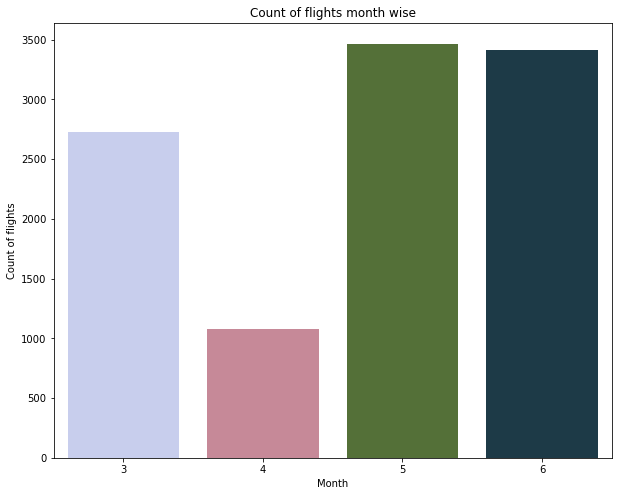

In [43]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data,palette='cubehelix_r')
plt.xlabel('Month')
plt.ylabel('Count of flights')

#### Count of flights with different Airlines

Text(0, 0.5, 'Count of flights')

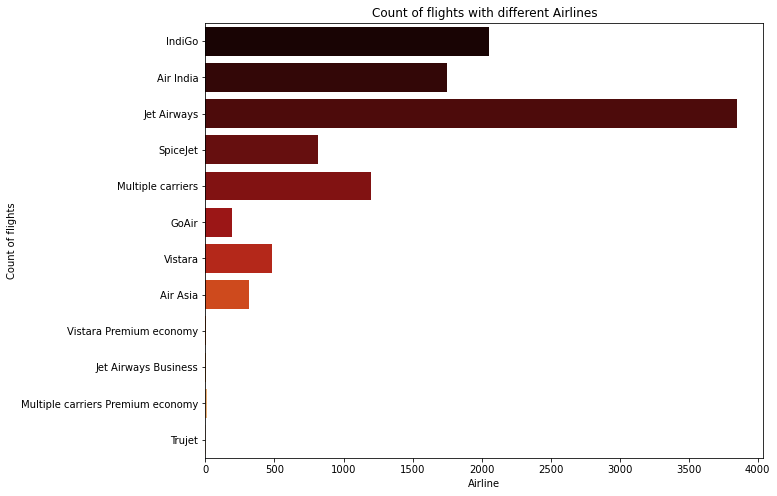

In [44]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(y = 'Airline', data = train_data,palette='gist_heat')
plt.xlabel('Airline')
plt.ylabel('Count of flights')

#### Inference:
1. There are more number of flights of Jet Airways.

2. Vistara Premium economy, Jet Airways Business and Trujet have actually almost negligible flights.

3. Multiple carriers Premium economy has very few flights.

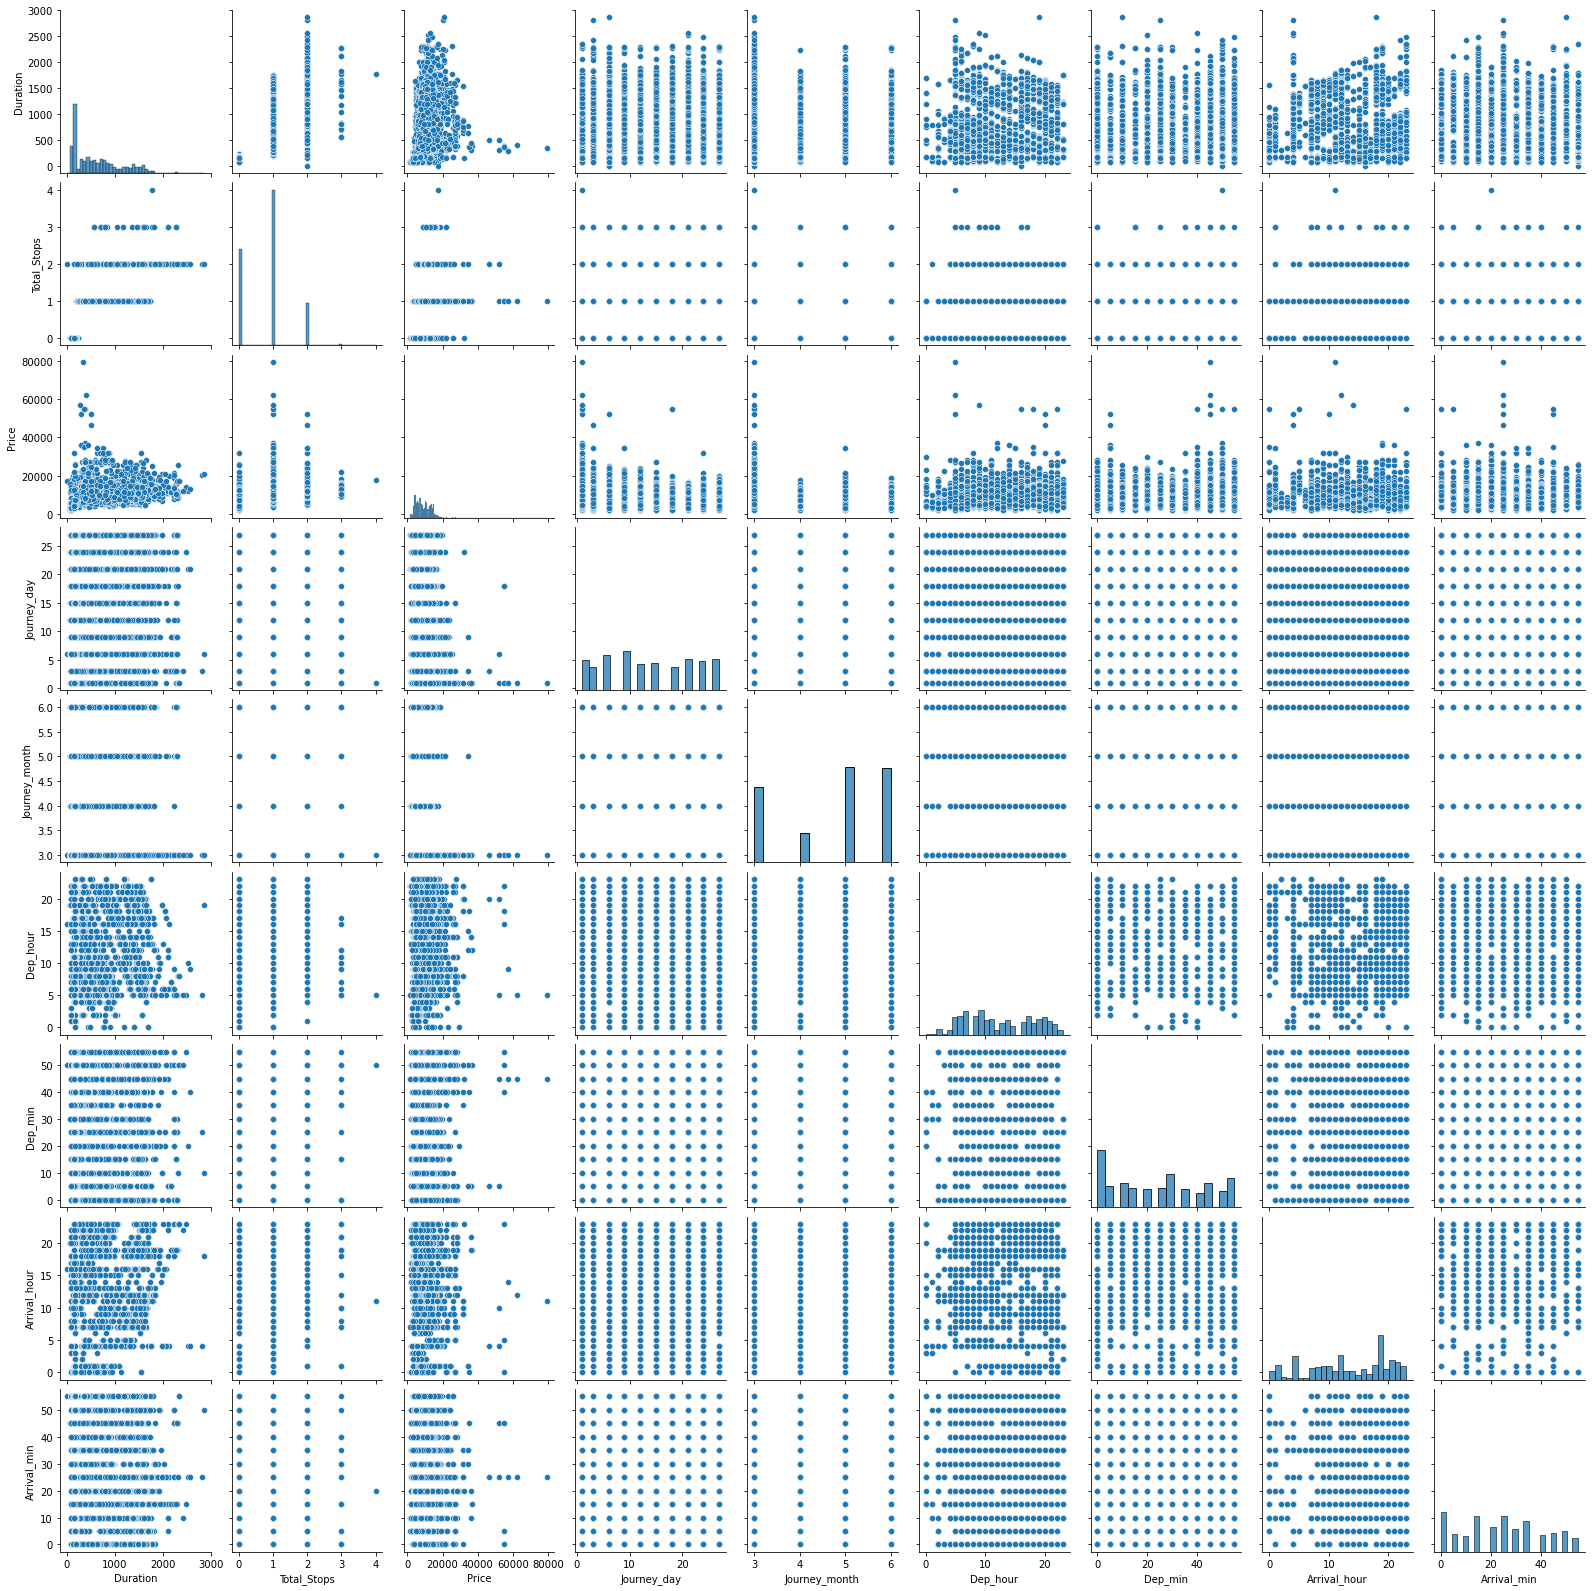

In [45]:
sns.pairplot(data=train_data)

#### Airline VS Price

Text(0, 0.5, 'Price of ticket')

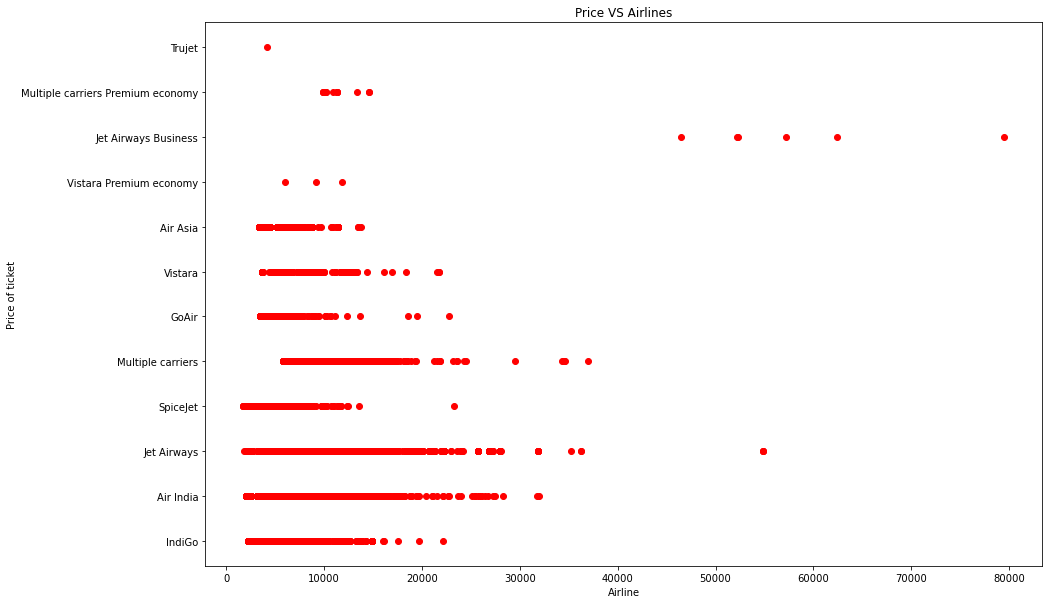

In [46]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Price'], train_data['Airline'],color="red")
plt.xlabel('Airline')
plt.ylabel('Price of ticket')

#### From the above scatter diagram we could see the how the data points are scattered for Airline with respect to price and shows the ticket fare for Jet Airways Business airline is high.

#### Dropping unnecessary 'Additional_Info' column from training as well as testing with and without duplicates datasets.

In [47]:
train_data.drop('Additional_Info',axis=1,inplace=True)

In [48]:
train_data1.drop('Additional_Info',axis=1,inplace = True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
test_data.drop('Additional_Info',axis=1,inplace=True)

In [50]:
test_data1.drop('Additional_Info',axis=1,inplace=True)

#### With Duplicate Dataset

#### Label Encoding for categorical features

In [51]:
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
train_data['Airline']=label_encoder1.fit_transform(train_data['Airline'])
train_data['Source']=label_encoder2.fit_transform(train_data['Source'])
train_data['Destination']=label_encoder3.fit_transform(train_data['Destination'])
train_data['Route']=label_encoder4.fit_transform(train_data['Route'])

In [52]:
train_data['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

#### To convert the encoded feature back to its original values

In [53]:
label_encoder1.inverse_transform([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

#### Removing the Target variable

In [54]:
Y_train_data=train_data['Price']
X_train_data=train_data.drop('Price',axis=1)

In [55]:
X_train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [56]:
li = [0.2,0.25,0.3,0.35,0.4]
for i in li:
    stand_x=preprocessing.scale(X_train_data)
    X_train, X_test, y_train, y_test = train_test_split(
        stand_x, Y_train_data, test_size=i, random_state=105)    
    xgb= XGBRegressor()
    model = XGBRegressor()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('mean_squared_error : ', mean_squared_error(y_test, predictions))
    print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
    print('Acuracy on split ratio : ',1-i,':',i)
    print('Testing Data r2_score',model.score(X_test,y_test))
    print('Training Data r2_score',model.score(X_train,y_train))
    print("*"*50)

mean_squared_error :  4743313.179482409
mean_absolute_error :  1168.3118546324797
Acuracy on split ratio :  0.8 : 0.2
Testing Data r2_score 0.8101331862404891
Training Data r2_score 0.9360723585725893
**************************************************
mean_squared_error :  4268826.17066288
mean_absolute_error :  1185.1296834142322
Acuracy on split ratio :  0.75 : 0.25
Testing Data r2_score 0.8201638504106674
Training Data r2_score 0.9371123096431286
**************************************************
mean_squared_error :  4368727.17912435
mean_absolute_error :  1189.141790514394
Acuracy on split ratio :  0.7 : 0.3
Testing Data r2_score 0.8091542317194897
Training Data r2_score 0.9418116702745307
**************************************************
mean_squared_error :  3569686.7511014757
mean_absolute_error :  1168.0250059729592
Acuracy on split ratio :  0.65 : 0.35
Testing Data r2_score 0.8446228085096328
Training Data r2_score 0.9460545768375561
*****************************************

In [57]:
test_data['Airline']=label_encoder1.fit_transform(test_data['Airline'])
test_data['Source']=label_encoder2.fit_transform(test_data['Source'])
test_data['Destination']=label_encoder3.fit_transform(test_data['Destination'])
test_data['Route']=label_encoder4.fit_transform(test_data['Route'])

In [58]:
stand_test=preprocessing.scale(test_data)

In [59]:
test_data['pred']=model.predict(test_data)

In [60]:
test_data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,pred
0,4,2,1,76,655,1,6,6,17,30,4,25,4252.485352
1,3,3,0,65,240,1,12,5,6,20,10,20,4252.485352
2,4,2,1,76,1425,1,21,5,19,15,19,0,6441.726562
3,6,2,1,76,780,1,21,5,8,0,21,0,7294.432129
4,0,0,2,16,170,0,24,6,23,55,2,45,7408.455078
5,4,2,1,76,1100,1,12,6,18,15,12,35,4252.485352
6,1,0,5,24,905,1,12,3,7,30,22,35,5301.277344
7,3,3,0,57,315,1,1,5,15,15,20,30,6379.118652
8,3,3,0,43,165,0,15,3,10,10,12,55,4252.485352
9,4,3,0,45,365,1,18,5,16,30,22,35,4252.485352


In [61]:
test_data['pred'].describe()

count     2671.000000
mean      5997.169434
std       2225.371826
min       2029.570801
25%       4252.485352
50%       5408.119629
75%       6865.951660
max      13917.958008
Name: pred, dtype: float64

#### Without Duplicate Dataset

#### Label Encoding for categorical features

In [62]:
label_encoder5 = preprocessing.LabelEncoder()
label_encoder6 = preprocessing.LabelEncoder()
label_encoder7 = preprocessing.LabelEncoder()
label_encoder8 = preprocessing.LabelEncoder()
train_data1['Airline']=label_encoder5.fit_transform(train_data1['Airline'])
train_data1['Source']=label_encoder6.fit_transform(train_data1['Source'])
train_data1['Destination']=label_encoder7.fit_transform(train_data1['Destination'])
train_data1['Route']=label_encoder8.fit_transform(train_data1['Route'])

<ipython-input-62-f7ceff2e3d06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Airline']=label_encoder5.fit_transform(train_data1['Airline'])
<ipython-input-62-f7ceff2e3d06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Source']=label_encoder6.fit_transform(train_data1['Source'])
<ipython-input-62-f7ceff2e3d06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [63]:
train_data1['Source'].unique()

array([0, 3, 2, 1, 4])

#### To convert the encoded feature back to its original values

In [64]:
label_encoder6.inverse_transform([0, 3, 2, 1, 4])

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [65]:
train_data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0.0,3897,24,3,22,20,1,10
1,1,3,0,84,445,2.0,7662,1,5,5,50,13,15
2,4,2,1,118,1140,2.0,13882,9,6,9,25,4,25
3,3,3,0,91,325,1.0,6218,12,5,18,5,23,30
4,3,0,5,29,285,1.0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,0.0,4107,9,4,19,55,22,25
10679,1,3,0,64,155,0.0,4145,27,4,20,45,23,20
10680,4,0,2,18,180,0.0,7229,27,4,8,20,11,20
10681,10,0,5,18,160,0.0,12648,1,3,11,30,14,10


#### Removing the Target variable

In [66]:
Y_train_data1=train_data1['Price']
X_train_data1=train_data1.drop('Price',axis=1)

In [67]:
X_train_data1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [68]:
X_train_data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0.0,24,3,22,20,1,10
1,1,3,0,84,445,2.0,1,5,5,50,13,15
2,4,2,1,118,1140,2.0,9,6,9,25,4,25
3,3,3,0,91,325,1.0,12,5,18,5,23,30
4,3,0,5,29,285,1.0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,0.0,9,4,19,55,22,25
10679,1,3,0,64,155,0.0,27,4,20,45,23,20
10680,4,0,2,18,180,0.0,27,4,8,20,11,20
10681,10,0,5,18,160,0.0,1,3,11,30,14,10


In [69]:
li = [0.2,0.25,0.3,0.35,0.4]
for i in li:
    stand_x=preprocessing.scale(X_train_data1)
    X_train, X_test, y_train, y_test = train_test_split(
        stand_x, Y_train_data1, test_size=i, random_state=105)    
    xgb= XGBRegressor()
    model = XGBRegressor()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print('mean_squared_error : ', mean_squared_error(y_test, predictions))
    print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))
    print('Acuracy on split ratio : ',1-i,':',i)
    print('Testing Data r2_score',model.score(X_test,y_test))
    print('Training Data r2_score',model.score(X_train,y_train))
    print("*"*50)

mean_squared_error :  3002102.297379886
mean_absolute_error :  1153.1865609975962
Acuracy on split ratio :  0.8 : 0.2
Testing Data r2_score 0.837142157850254
Training Data r2_score 0.9394500538634484
**************************************************
mean_squared_error :  3665124.8937090426
mean_absolute_error :  1193.3123561380835
Acuracy on split ratio :  0.75 : 0.25
Testing Data r2_score 0.8216558241844338
Training Data r2_score 0.9396648735383751
**************************************************
mean_squared_error :  3610781.3201733627
mean_absolute_error :  1172.9814689954628
Acuracy on split ratio :  0.7 : 0.3
Testing Data r2_score 0.8221571106661422
Training Data r2_score 0.9417206302377973
**************************************************
mean_squared_error :  3393295.0880425824
mean_absolute_error :  1169.7906808397531
Acuracy on split ratio :  0.65 : 0.35
Testing Data r2_score 0.8377525532019025
Training Data r2_score 0.9439822614763698
*************************************

In [70]:
test_data1['Airline']=label_encoder5.fit_transform(test_data1['Airline'])
test_data1['Source']=label_encoder6.fit_transform(test_data1['Source'])
test_data1['Destination']=label_encoder7.fit_transform(test_data1['Destination'])
test_data1['Route']=label_encoder8.fit_transform(test_data1['Route'])

<ipython-input-70-b94e0b6aa7ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Airline']=label_encoder5.fit_transform(test_data1['Airline'])
<ipython-input-70-b94e0b6aa7ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Source']=label_encoder6.fit_transform(test_data1['Source'])
<ipython-input-70-b94e0b6aa7ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [71]:
stand_test=preprocessing.scale(test_data1)

In [72]:
test_data1['pred']=model.predict(test_data1)

<ipython-input-72-958fd14c9346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred']=model.predict(test_data1)


In [73]:
test_data1.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,pred
0,4,2,1,76,655,1,6,6,17,30,4,25,6998.780762
1,3,3,0,65,240,1,12,5,6,20,10,20,6998.780762
2,4,2,1,76,1425,1,21,5,19,15,19,0,5602.738281
3,6,2,1,76,780,1,21,5,8,0,21,0,7136.609863
4,0,0,2,16,170,0,24,6,23,55,2,45,7653.417480
5,4,2,1,76,1100,1,12,6,18,15,12,35,6998.780762
6,1,0,5,24,905,1,12,3,7,30,22,35,5363.590332
7,3,3,0,57,315,1,1,5,15,15,20,30,7497.458496
8,3,3,0,43,165,0,15,3,10,10,12,55,6998.780762
9,4,3,0,45,365,1,18,5,16,30,22,35,6998.780762


In [74]:
test_data1['pred'].describe()

count     2645.000000
mean      7829.496582
std       2171.167725
min       3416.607422
25%       6630.235352
50%       7003.340820
75%       8340.269531
max      15846.096680
Name: pred, dtype: float64

In [75]:
Y_train_data1.describe()

count    10463.000000
mean      9026.642454
std       4624.653227
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12343.500000
max      79512.000000
Name: Price, dtype: float64

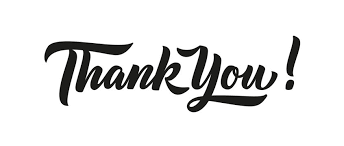